In [161]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 



In [162]:
testperson = 9

In [163]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment\data\gaze_data_Bengisu_9.csv")
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.275324,0,1,NaN,NaN,NaN,-38.309055,61.148888,644.108704,NaN,...,NaN,3.036087,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive
1,0.287156,1,1,-101.320732,56.548542,636.725952,-38.309055,61.148888,644.108704,0.729961,...,3.484924,3.036087,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive
2,0.298126,1,1,-102.213341,56.532265,636.571960,-43.230370,60.973019,643.718689,0.732021,...,3.269684,3.056366,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive
3,0.309097,1,1,-102.213341,56.532265,636.571960,-43.230370,60.973019,643.718689,0.732021,...,3.269684,3.056366,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive
4,0.321067,1,1,-103.930847,56.479580,636.297913,-44.256855,60.942280,643.646362,0.735978,...,3.242950,3.092697,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive
5,0.332024,1,1,-107.002060,56.330887,635.639832,-47.602757,60.802597,643.237793,0.743129,...,3.260544,3.108032,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive
6,0.342000,1,1,-107.002060,56.330887,635.639832,-47.602757,60.802597,643.237793,0.743129,...,3.260544,3.108032,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive
7,0.353947,1,1,-107.421059,56.294304,635.478943,-47.994064,60.774151,643.136963,0.744133,...,3.196930,3.078201,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive
8,0.364918,1,1,-111.583870,55.889332,633.976868,-52.186901,60.418060,642.082947,0.754099,...,3.219879,3.100052,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive
9,0.375877,1,1,-111.583870,55.889332,633.976868,-52.588028,60.399899,642.038879,0.754099,...,3.219879,3.200821,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive


In [164]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(187391, 39)

In [165]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P08_text.txt', 'AI_HC_P08_MCQ.txt', 'AI_HC_P08_FIBQ.txt',
       'OR_HC_P08_text.txt', 'OR_HC_P08_MCQ.txt', 'OR_HC_P08_FIBQ.txt',
       'AI_SK_P08_text.txt', 'AI_SK_P08_MCQ.txt', 'AI_SK_P08_FIBQ.txt',
       'OR_SK_P08_text.txt', 'OR_SK_P08_MCQ.txt', 'OR_SK_P08_FIBQ.txt',
       'AI_KB_P08_text.txt', 'AI_KB_P08_MCQ.txt', 'AI_KB_P08_FIBQ.txt',
       'OR_KB_P08_text.txt', 'OR_KB_P08_MCQ.txt', 'OR_KB_P08_FIBQ.txt'],
      dtype=object)

In [166]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 
im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.000000,1,1,-63.034405,22.616655,551.235657,-7.761264,30.679474,554.928894,0.666805,...,2.822311,2.768341,True,OR_SK_P08_text.txt,8.0,20.0,Times New Roman,SK,False,Immersive
1,0.010933,1,1,-63.034405,22.616655,551.235657,-7.571977,30.897436,555.390991,0.666805,...,2.822311,2.764969,True,OR_SK_P08_text.txt,8.0,20.0,Times New Roman,SK,False,Immersive
2,0.023133,1,1,-62.975624,22.824028,552.207886,-7.441219,31.112604,556.172729,0.666360,...,2.808167,2.748459,True,OR_SK_P08_text.txt,8.0,20.0,Times New Roman,SK,False,Immersive
3,0.033422,1,1,-62.613174,23.466269,554.122925,-7.239297,31.502073,557.639343,0.664844,...,2.800903,2.752090,True,OR_SK_P08_text.txt,8.0,20.0,Times New Roman,SK,False,Immersive
4,0.045121,1,1,-62.570709,23.516533,554.285217,-7.166318,31.637262,557.986206,0.664686,...,2.812073,2.744080,True,OR_SK_P08_text.txt,8.0,20.0,Times New Roman,SK,False,Immersive


In [167]:
left_x = im_SK_OR['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_OR['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_OR['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_OR['right_gaze_point_on_display_area_y']*1440
t = im_SK_OR['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,1012.949371,1044.320679,313.703763,357.257044
1,0.010933,1011.998215,1044.320679,320.062573,357.257044
2,0.023133,1016.705933,1047.678528,313.797255,353.340933
3,0.033422,1019.117508,1059.219589,315.645232,363.979282
4,0.045121,1021.501312,1057.827301,315.614269,350.049241
...,...,...,...,...,...
15936,179.929006,1424.202728,1519.073639,1054.987650,1032.499666
15937,179.939247,1424.354553,1522.902679,1056.466942,1035.225391
15938,179.950769,1427.612610,1518.556671,1060.314217,1035.901480
15939,179.962558,1430.506592,1506.684875,1053.810139,1037.752590


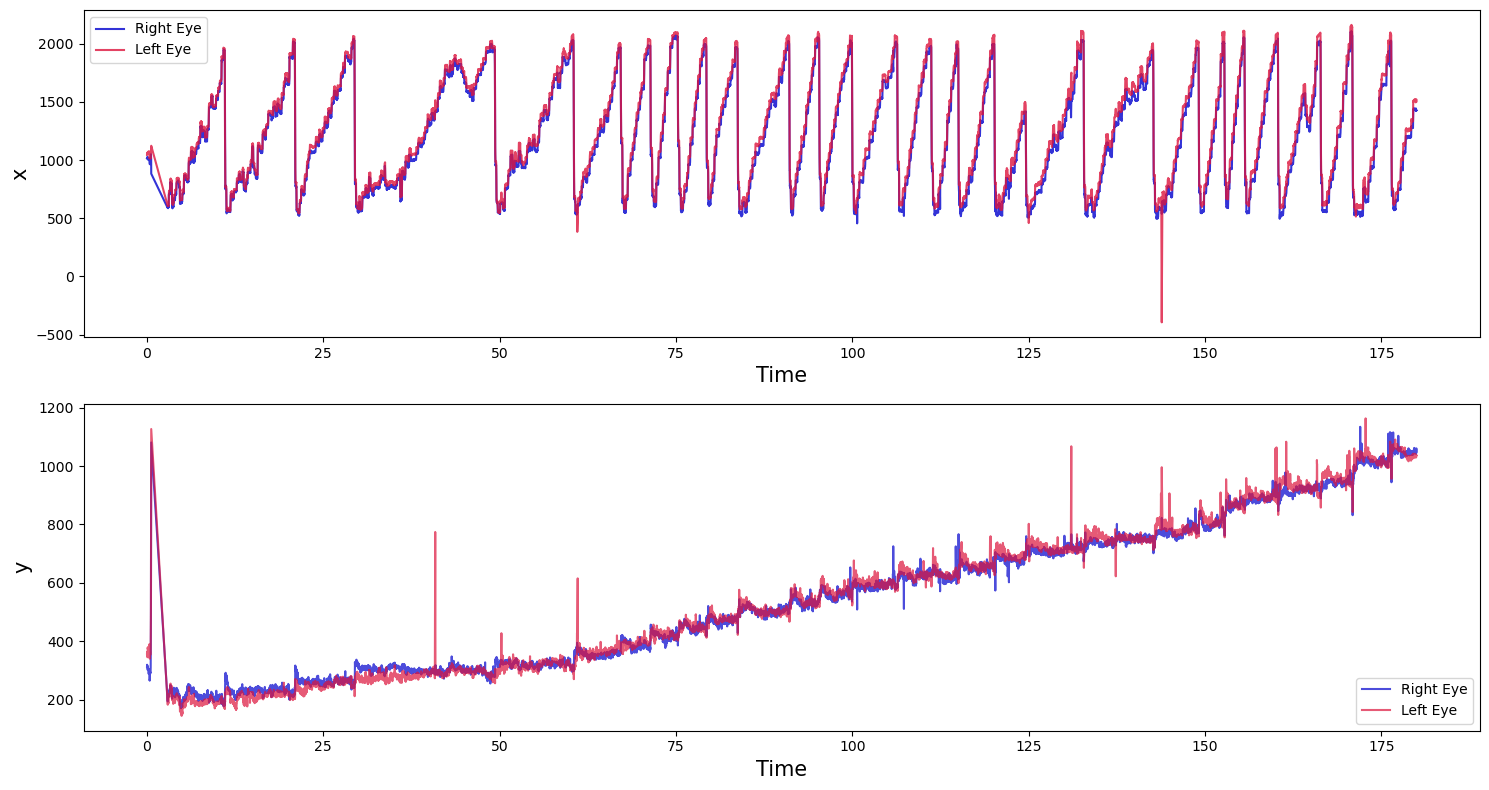

In [168]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [169]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [170]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [171]:
imerserive_parts = [im_HC_AI ,
im_HC_OR ,
im_SK_AI ,
im_SK_OR ,
im_KB_AI ,
im_KB_OR ]

In [172]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,760.924911,814.823608,545.225544,594.616985
1,0.011410,759.388885,810.473862,548.163657,593.867340
2,0.021591,767.544479,810.733261,548.404713,590.893006
3,0.033833,762.448959,818.957367,550.897579,591.790624
4,0.045101,769.589920,822.358551,549.749508,594.996357
...,...,...,...,...,...
1605,18.032840,1376.411591,1460.312805,886.034317,891.665154
1606,18.042873,1396.830902,1475.492554,891.824799,891.836901
1607,18.054934,1418.342590,1495.395660,898.340120,891.872349
1608,18.065677,1440.338287,1511.866608,902.534580,891.804028


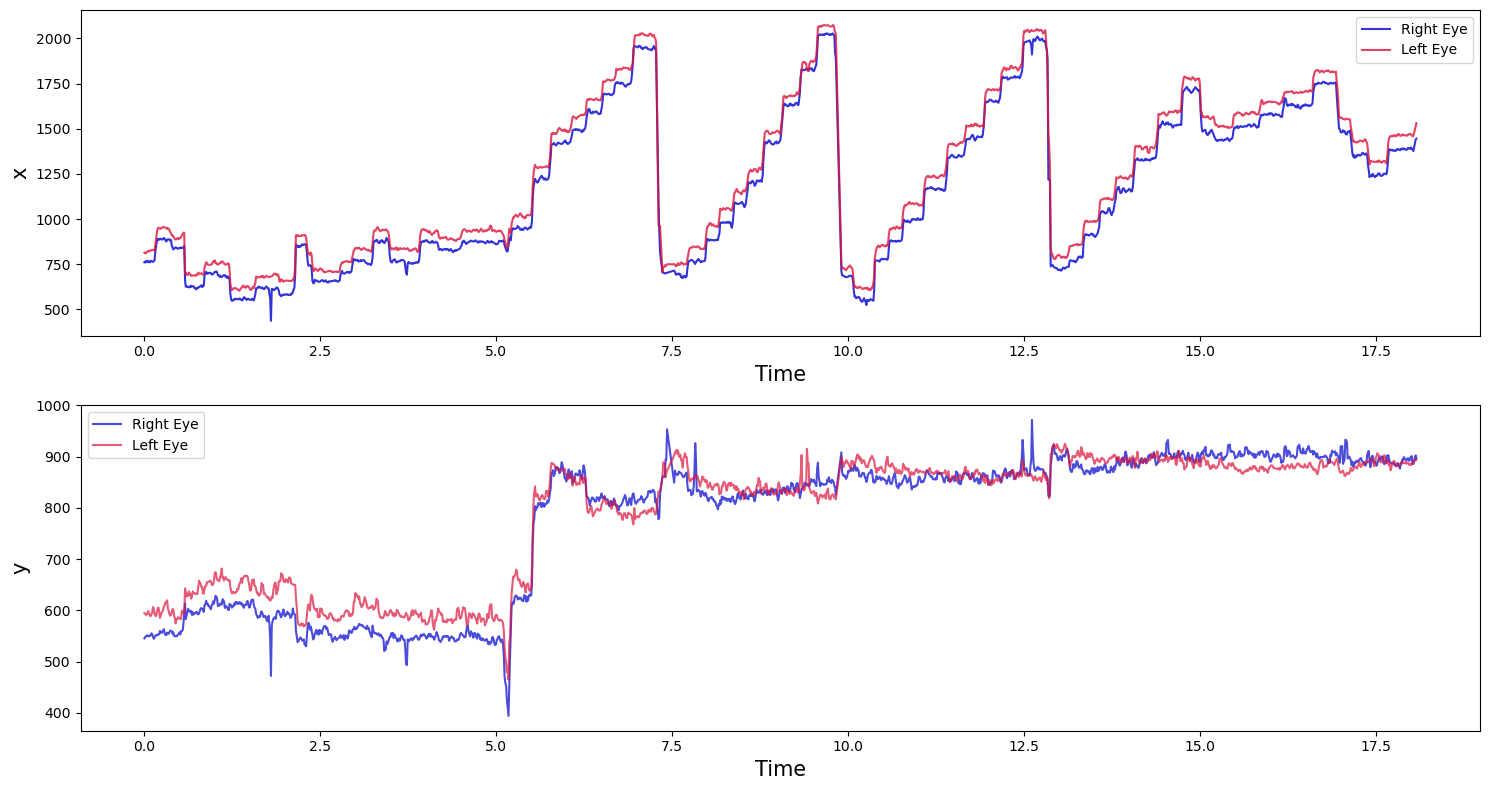

In [173]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


IHMM parameters re-estimation failed! Returning to original parameters.



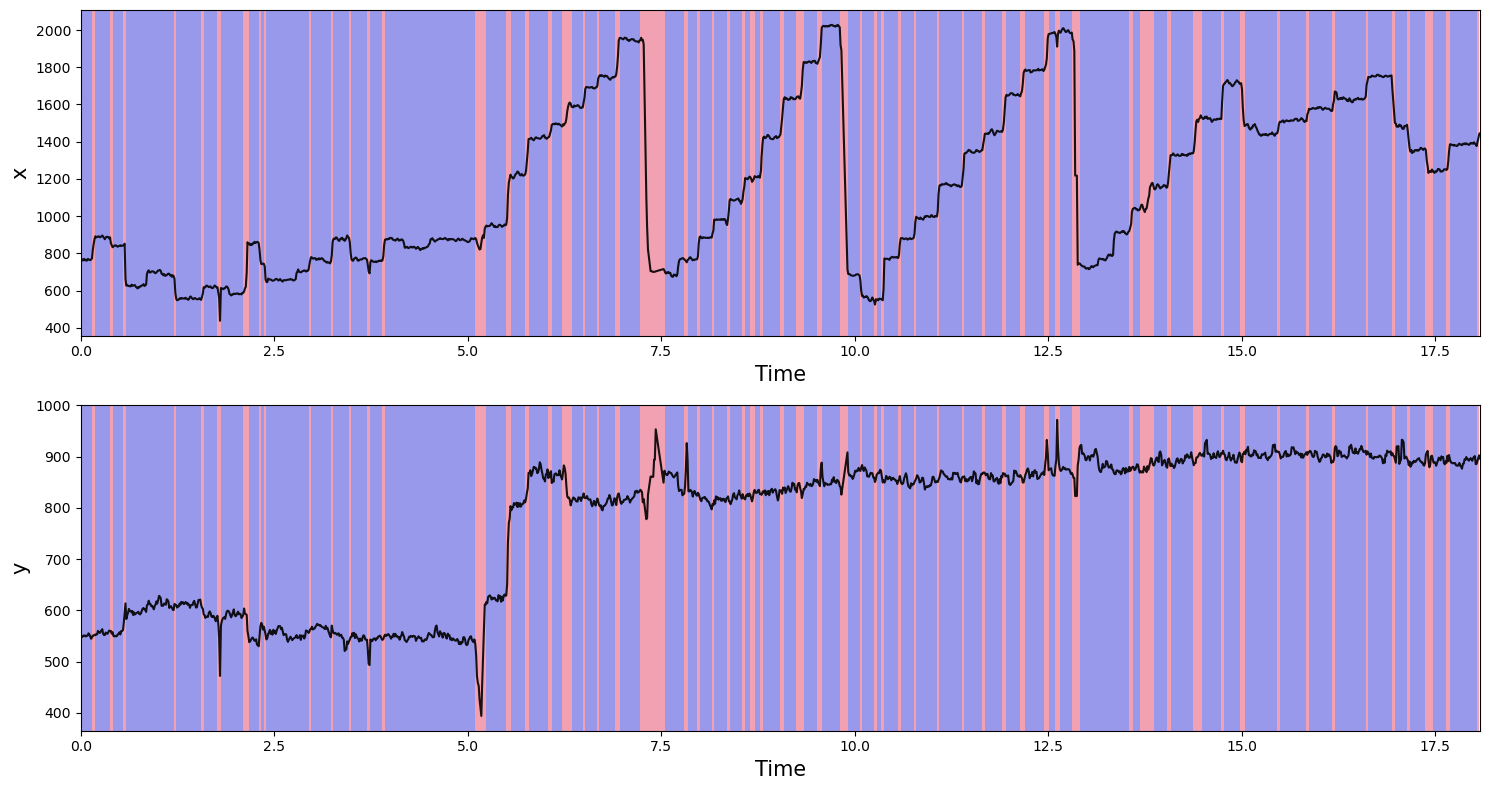

In [174]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [175]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [176]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-35.762932,26.462236,587.508423,23.213251,23.747660,588.137390,0.590334,...,3.008286,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Skimming,0
1,0.010981,1,1,-36.154816,26.658640,587.441772,22.949007,23.980917,588.114258,0.591291,...,3.029907,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Skimming,1
2,0.021457,1,1,-36.583942,26.898731,587.859009,22.038961,24.765675,588.506042,0.592265,...,3.032959,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Skimming,1
3,0.033402,1,1,-36.984478,27.127338,587.942322,21.528152,25.200691,588.641907,0.593219,...,3.032104,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Skimming,0
4,0.044372,1,1,-37.436230,27.406994,587.976196,21.315191,25.377054,588.843079,0.594303,...,3.011063,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Skimming,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,8.248457,1,1,-48.146809,31.777199,583.701965,8.474791,35.585155,585.863525,0.621046,...,2.760956,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Skimming,1
711,8.260392,1,1,-48.220814,31.776085,583.765442,8.428278,35.601574,585.929565,0.621214,...,2.762146,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Skimming,1
712,8.271394,1,1,-48.313694,31.778347,583.845886,8.354880,35.604698,586.010498,0.621425,...,2.750931,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Skimming,1
713,8.282368,1,1,-48.481094,31.763771,584.057312,8.208954,35.618336,586.254944,0.621792,...,2.752213,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Skimming,1


In [177]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [178]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-101.320732,56.548542,636.725952,-38.309055,61.148888,644.108704,0.729961,...,3.036087,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive,0
1,0.010970,1,1,-102.213341,56.532265,636.571960,-43.230370,60.973019,643.718689,0.732021,...,3.056366,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive,0
2,0.021940,1,1,-102.213341,56.532265,636.571960,-43.230370,60.973019,643.718689,0.732021,...,3.056366,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive,0
3,0.033911,1,1,-103.930847,56.479580,636.297913,-44.256855,60.942280,643.646362,0.735978,...,3.092697,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive,0
4,0.044868,1,1,-107.002060,56.330887,635.639832,-47.602757,60.802597,643.237793,0.743129,...,3.108032,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,91.458179,1,1,-38.864170,29.381500,576.328430,19.059416,31.566254,577.434082,0.599606,...,2.588531,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive,1
8163,91.469175,1,1,-39.117115,29.358339,576.451477,18.875591,31.589968,577.554810,0.600213,...,2.601135,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive,1
8164,91.479115,1,1,-39.497833,29.300686,576.612427,18.469284,31.638813,577.776245,0.601131,...,2.600800,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive,1
8165,91.491083,1,1,-39.715168,29.279173,576.607971,18.254721,31.667957,577.796021,0.601670,...,2.601929,True,AI_HC_P08_text.txt,8.0,20.0,Times New Roman,HC,False,Immersive,1


In [179]:
colunms_to_drop = ['Reading', 'text_file', 'passage_index', 'AI', 'Label']
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns = colunms_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns = colunms_to_drop)

In [180]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [181]:
com_DF = pd.concat(x_data, ignore_index=True)

com_DF.to_csv(f'x_data_{testperson}.csv', index = False)
np.savetxt(f'y_label_{testperson}.csv', y_label, fmt='%s', delimiter=",")